<a href="https://colab.research.google.com/github/gitmayanksingh/MachineLearning/blob/master/COVID_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# storing and anaysis
import numpy as np
import pandas as pd

# visualization
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

from plotnine import *

# color pallette
cdr = ['#393e46', '#ff2e63', '#30e3ca'] # grey - red - blue
idr = ['#f8b400', '#ff2e63', '#30e3ca'] # yellow - red - blue

In [2]:
pip install calmap

In [0]:
import calmap
import plotly.express as px
import folium

In [0]:
data = pd.read_csv('/content/covid_19_clean_complete.csv',parse_dates=['Date'])

In [0]:
cases = ['Confirmed', 'Deaths', 'Recovered', 'Active']

# Active Case = confirmed - deaths - recovered
data['Active'] = data['Confirmed'] - data['Deaths'] - data['Recovered']

In [0]:
data['Country/Region'] =  data['Country/Region'].replace('Mainland China','China')

In [184]:
data.style.background_gradient(cmap='Pastel1')
data.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active
0,NA,Thailand,15.0000,101.0000,2020-01-22,2,0,0,2
1,NA,Japan,36.0000,138.0000,2020-01-22,2,0,0,2
2,NA,Singapore,1.2833,103.8333,2020-01-22,0,0,0,0
3,NA,Nepal,28.1667,84.2500,2020-01-22,0,0,0,0
4,NA,Malaysia,2.5000,112.5000,2020-01-22,0,0,0,0


In [185]:
data.shape

(11960, 9)

In [186]:
data.isnull().sum()

Province/State    0
Country/Region    0
Lat               0
Long              0
Date              0
Confirmed         0
Deaths            0
Recovered         0
Active            0
dtype: int64

In [0]:
latest_date = pd.to_datetime(data.Date).max()

In [0]:
# filling missing values with NA
data[['Province/State']] = data[['Province/State']].fillna('NA')

In [0]:
ship = data[data['Province/State']=='Diamond Princess cruise ship']

In [190]:
ship.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active


In [298]:
temp_world = data.groupby('Date')['Confirmed', 'Deaths', 'Recovered', 'Active'].sum().reset_index()
temp_world = temp_world[temp_world['Date']==max(temp_world['Date'])].reset_index(drop=True)
temp_world.style.background_gradient(cmap='Pastel1')

,Date,Confirmed,Deaths,Recovered,Active
0,2020-03-13 00:00:00,145193,5404,70251,69538


In [299]:
values_world  = [temp_world['Recovered'][0],temp_world['Deaths'][0],temp_world['Active'][0]]
colors_world = ['rainbow', 'orangered','mediumturquoise']

fig = go.Figure(data=[go.Pie(labels=['Recovered','Deaths','Active'], 
                             values=values_world , hole=.3)])

fig.update_traces(hoverinfo='label+percent+value', textinfo='label+percent', textfont_size=18,
                  marker=dict(colors=colors_world, line=dict(color='#000000', width=2)))

fig.update_layout(
    title_text="Death/Recovered Rate WORLD(ON "+" "+str(latest_date.date())+")", height=500, width=700, showlegend=False)

fig.show()

In [0]:
world = data[data['Province/State']!='Diamond Princess cruise ship']

In [0]:
china = world[world['Country/Region']=='China']

In [200]:
temp_china = china.groupby('Date')['Confirmed', 'Deaths', 'Recovered', 'Active'].sum().reset_index()
temp_china = temp_china[temp_china['Date']==max(temp_china['Date'])].reset_index(drop=True)
temp_china.style.background_gradient(cmap='Pastel1')

,Date,Confirmed,Deaths,Recovered,Active
0,2020-03-13 00:00:00,80945,3180,64196,13569


In [0]:
outside_china = world[world['Country/Region']!='China']

In [199]:
temp_outside_china = outside_china.groupby('Date')['Confirmed', 'Deaths', 'Recovered', 'Active'].sum().reset_index()
temp_outside_china = temp_outside_china[temp_outside_china['Date']==max(temp_outside_china['Date'])].reset_index(drop=True)
temp_outside_china.style.background_gradient(cmap='Pastel1')

,Date,Confirmed,Deaths,Recovered,Active
0,2020-03-13 00:00:00,64248,2224,6055,55969


In [0]:
india = outside_china[outside_china['Country/Region']=='India']

In [0]:
#india

In [292]:
temp_india = india.groupby('Date')['Confirmed', 'Deaths', 'Recovered', 'Active'].sum().reset_index()
temp_india = temp_india[temp_india['Date']==max(temp_india['Date'])].reset_index(drop=True)
temp_india.style.background_gradient(cmap='Pastel1')

,Date,Confirmed,Deaths,Recovered,Active
0,2020-03-13 00:00:00,82,2,4,76


In [294]:
temp_india['Recovered'][0]

4

In [295]:
values_india = [temp_india['Recovered'][0],temp_india['Deaths'][0],temp_india['Active'][0]]
colors_india = ['rainbow', 'orangered','mediumturquoise']

fig = go.Figure(data=[go.Pie(labels=['Recovered','Deaths','Active'], 
                             values=values_india , hole=.3)])

fig.update_traces(hoverinfo='label+percent+value', textinfo='label+percent', textfont_size=18,
                  marker=dict(colors=colors_india, line=dict(color='#000000', width=2)))

fig.update_layout(
    title_text="Death/Recovered Rate in India(ON "+" "+str(latest_date.date())+")", height=500, width=700, showlegend=False)

fig.show()

In [0]:
world_latest = world[world['Date'] == max(data['Date'])].reset_index()

In [0]:
#world_latest

In [0]:
china_latest = world_latest[world_latest['Country/Region']=='China']

In [0]:
#china_latest

In [0]:
outside_china_latest = world_latest[world_latest['Country/Region']!='China']

In [0]:
#outside_china_latest

In [0]:
india_latest = outside_china_latest[outside_china_latest['Country/Region']=='India']

In [208]:
india_latest

,index,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active
15,11745,NA,India,21.0,78.0,2020-03-13,82,2,4,76


In [0]:
world_latest_grouped = world_latest.groupby('Country/Region')['Confirmed','Deaths','Recovered', 'Active'].sum().reset_index()

In [213]:
world_latest_grouped

,Country/Region,Confirmed,Deaths,Recovered,Active
0,Afghanistan,7,0,0,7
1,Albania,33,1,0,32
2,Algeria,26,2,8,16
3,Andorra,1,0,0,1
4,Antigua and Barbuda,1,0,0,1
...,...,...,...,...,...
120,US,2179,47,12,2120
121,Ukraine,3,1,0,2
122,United Arab Emirates,85,0,17,68
123,United Kingdom,801,8,19,774


In [0]:
china_latest_grouped = china_latest.groupby('Province/State')['Confirmed','Deaths','Recovered', 'Active'].sum().reset_index()

In [215]:
china_latest_grouped

,Province/State,Confirmed,Deaths,Recovered,Active
0,Anhui,990,6,984,0
1,Beijing,436,8,342,86
2,Chongqing,576,6,566,4
3,Fujian,296,1,295,0
4,Gansu,127,2,88,37
5,Guangdong,1356,8,1296,52
6,Guangxi,252,2,243,7
7,Guizhou,146,2,140,4
8,Hainan,168,6,160,2
9,Hebei,318,6,310,2


In [0]:
outside_china_latest_grouped = outside_china_latest.groupby('Country/Region')['Confirmed','Deaths','Recovered', 'Active'].sum().reset_index()

In [217]:
outside_china_latest_grouped

,Country/Region,Confirmed,Deaths,Recovered,Active
0,Afghanistan,7,0,0,7
1,Albania,33,1,0,32
2,Algeria,26,2,8,16
3,Andorra,1,0,0,1
4,Antigua and Barbuda,1,0,0,1
...,...,...,...,...,...
119,US,2179,47,12,2120
120,Ukraine,3,1,0,2
121,United Arab Emirates,85,0,17,68
122,United Kingdom,801,8,19,774


In [0]:
india_latest_grouped = india_latest.groupby('Province/State')['Confirmed','Deaths','Recovered', 'Active'].sum().reset_index()

In [219]:
india_latest_grouped

,Province/State,Confirmed,Deaths,Recovered,Active
0,NA,82,2,4,76


In [220]:
temp = world_latest.groupby(['Country/Region', 'Province/State'])['Confirmed', 'Deaths', 'Recovered', 'Active'].max()
temp.style.background_gradient(cmap='Pastel1_r')

,,Confirmed,Deaths,Recovered,Active
Country/Region,Province/State,,,,
Afghanistan,NA,7,0,0,7
Albania,NA,33,1,0,32
Algeria,NA,26,2,8,16
Andorra,NA,1,0,0,1
Antigua and Barbuda,NA,1,0,0,1
Argentina,NA,31,2,0,29
Armenia,NA,8,0,0,8
Aruba,NA,2,0,0,2
Australia,Australian Capital Territory,1,0,0,1


In [221]:
temp_1 = world_latest_grouped[['Country/Region','Confirmed', 'Deaths', 'Recovered', 'Active']]
temp_1 = temp_1.sort_values(by='Confirmed',ascending=False)
temp_1 = temp_1.reset_index(drop=True)
temp_1.style.background_gradient(cmap='Paired')

,Country/Region,Confirmed,Deaths,Recovered,Active
0,China,80945,3180,64196,13569
1,Italy,17660,1266,1439,14955
2,Iran,11364,514,2959,7891
3,"Korea, South",7979,66,510,7403
4,Spain,5232,133,193,4906
5,Germany,3675,7,46,3622
6,France,3667,79,12,3576
7,US,2179,47,12,2120
8,Switzerland,1139,11,4,1124
9,Norway,996,0,1,995


Countries with their <b> DEATH </b> numbers

In [128]:
temp_d = world_latest_grouped[['Country/Region','Deaths']]
temp_d = temp_d.sort_values(by='Deaths',ascending=False)
temp_d = temp_d.reset_index(drop=True)
temp_d = temp_d[temp_d.Deaths>0]
temp_d.style.background_gradient(cmap='Reds')

,Country/Region,Deaths
0,China,3180
1,Italy,1266
2,Iran,514
3,Spain,133
4,France,79
5,"Korea, South",66
6,US,47
7,Japan,19
8,Switzerland,11
9,Netherlands,10


Countries with <b> NO CASES RECOVERED </b>

In [222]:
temp_n_r = world_latest_grouped[['Country/Region','Confirmed','Deaths','Recovered', 'Active']]
temp_n_r = temp_n_r.sort_values(by='Confirmed',ascending=False)
temp_n_r = temp_n_r[temp_n_r.Recovered==0]
temp_n_r = temp_n_r.reset_index(drop=True)
temp_n_r.style.background_gradient(cmap='Reds')

,Country/Region,Confirmed,Deaths,Recovered,Active
0,Netherlands,804,10,0,794
1,Qatar,320,0,0,320
2,Greece,190,1,0,189
3,Brazil,151,0,0,151
4,Slovenia,141,0,0,141
5,Czechia,141,0,0,141
6,Ireland,90,1,0,89
7,San Marino,80,5,0,75
8,Estonia,79,0,0,79
9,Poland,68,2,0,66


Countries with **ALL CASES RECOVERED**

In [224]:
temp_a_r = world_latest_grouped[['Country/Region','Confirmed','Deaths','Recovered', 'Active']]
temp_a_r = temp_a_r.sort_values(by='Confirmed',ascending=False)
temp_a_r = temp_a_r[temp_a_r.Recovered==temp_a_r.Confirmed]
temp_a_r = temp_a_r.reset_index(drop=True)
temp_a_r.style.background_gradient(cmap='Greens')

,Country/Region,Confirmed,Deaths,Recovered,Active
0,Jordan,1,0,1,0
1,Nepal,1,0,1,0


Countries with **ALL CASES DIED**

In [225]:
temp_a_d = world_latest_grouped[['Country/Region','Confirmed','Deaths','Recovered', 'Active']]
temp_a_d = temp_a_d.sort_values(by='Confirmed',ascending=False)
temp_a_d = temp_a_d[temp_a_d.Deaths==temp_a_d.Confirmed]
temp_a_d = temp_a_d.reset_index(drop=True)
temp_a_d.style.background_gradient(cmap='Reds')

,Country/Region,Confirmed,Deaths,Recovered,Active
0,Guyana,1,1,0,0
1,Sudan,1,1,0,0


<b>CHINA</b>

In [226]:
temp_c = china_latest_grouped[['Province/State','Confirmed', 'Deaths', 'Recovered', 'Active']]
temp_c = temp_c.sort_values(by='Confirmed',ascending=False)
temp_c = temp_c.reset_index(drop=True)
temp_c.style.background_gradient(cmap='Paired')

,Province/State,Confirmed,Deaths,Recovered,Active
0,Hubei,67786,3062,51553,13171
1,Guangdong,1356,8,1296,52
2,Henan,1273,22,1249,2
3,Zhejiang,1215,1,1197,17
4,Hunan,1018,4,1005,9
5,Anhui,990,6,984,0
6,Jiangxi,935,1,934,0
7,Shandong,760,7,739,14
8,Jiangsu,631,0,630,1
9,Chongqing,576,6,566,4


Province/State in <b> CHINA </b> with their <b> DEATH </b> numbers




In [227]:
temp_c_d = china_latest_grouped[['Province/State','Deaths']]
temp_c_d = temp_c_d.sort_values(by='Deaths',ascending=False)
temp_c_d = temp_c_d.reset_index(drop=True)
temp_c_d = temp_c_d[temp_c_d.Deaths>0]
temp_c_d.style.background_gradient(cmap='Reds')

,Province/State,Deaths
0,Hubei,3062
1,Henan,22
2,Heilongjiang,13
3,Guangdong,8
4,Beijing,8
5,Shandong,7
6,Hainan,6
7,Hebei,6
8,Chongqing,6
9,Anhui,6


Province/State in <b> CHINA </b> with NO CASES <b> RECOVERED </b>

In [228]:
temp_c_n_r = china_latest_grouped[['Province/State','Confirmed','Deaths','Recovered', 'Active']]
temp_c_n_r = temp_c_n_r.sort_values(by='Confirmed',ascending=False)
temp_c_n_r = temp_c_n_r[temp_c_n_r.Recovered==0]
temp_c_n_r = temp_c_n_r.reset_index(drop=True)
temp_c_n_r.style.background_gradient(cmap='Reds')

,Province/State,Confirmed,Deaths,Recovered,Active


<b> CHINA </b> is <b style="color:green"> RECOVERING </b>

Province/State in <b> CHINA </b> with ALL CASES <b> RECOVERED </b>

In [229]:
temp_c_a_r = china_latest_grouped[['Province/State','Confirmed','Deaths','Recovered', 'Active']]
temp_c_a_r = temp_c_a_r.sort_values(by='Confirmed',ascending=False)
temp_c_a_r = temp_c_a_r[temp_c_a_r.Recovered==temp_c_a_r.Confirmed]
temp_c_a_r = temp_c_a_r.reset_index(drop=True)
temp_c_a_r.style.background_gradient(cmap='Greens')

,Province/State,Confirmed,Deaths,Recovered,Active
0,Shanxi,133,0,133,0
1,Qinghai,18,0,18,0
2,Macau,10,0,10,0
3,Tibet,1,0,1,0


In [230]:
fig = px.bar(world_latest_grouped[['Country/Region', 'Confirmed']].sort_values('Confirmed', ascending=False), 
             y="Confirmed", x="Country/Region", color='Country/Region', 
             log_y=True, template='ggplot2', title='Confirmed Cases')
fig.show()

In [231]:
fig = px.bar(world_latest_grouped[['Country/Region', 'Deaths']].sort_values('Deaths', ascending=False), 
             y="Deaths", x="Country/Region", color='Country/Region', title='Deaths',
             log_y=True, template='ggplot2')
fig.show()

**TOP 20 Countries with Confirmed Cases**

In [315]:
fig = px.bar(world_latest_grouped.sort_values('Confirmed', ascending=False).head(20).sort_values('Confirmed', ascending=True), 
             x="Confirmed", y="Country/Region", title='TOP 20 Countries with Confirmed Cases', text='Confirmed', orientation='h', 
             width=700, height=700, range_x = [0, max(world_latest_grouped['Confirmed'])+10000])
fig.update_traces(marker_color=px.colors.cyclical.mygbm, opacity=0.6, textposition='outside')
fig.show()

**TOP 20 Countries with Recovered Cases**

In [319]:
fig = px.bar(world_latest_grouped.sort_values('Recovered', ascending=False).head(20).sort_values('Recovered', ascending=True), 
             x="Recovered", y="Country/Region", title='TOP 20 Countries with Recovered Cases', text='Recovered', orientation='h', 
             width=700, height=700, range_x = [0, max(world_latest_grouped['Recovered'])+10000])
fig.update_traces(marker_color='green',opacity=0.6, textposition='outside')
fig.show()

**TOP 20 Countries with Death Cases**

In [317]:
fig = px.bar(world_latest_grouped.sort_values('Deaths', ascending=False).head(20).sort_values('Deaths', ascending=True), 
             x="Deaths", y="Country/Region", title='TOP 20 Countries with Deaths Cases', text='Deaths', orientation='h', 
             width=700, height=700, range_x = [0, max(world_latest_grouped['Deaths'])+10000])
fig.update_traces(marker_color='red', opacity=0.6, textposition='outside')
fig.show()

**Coronavirus Cases Over Time**

In [0]:
date_a_r = world.groupby('Date')[['Country/Region','Confirmed']].sum().reset_index()

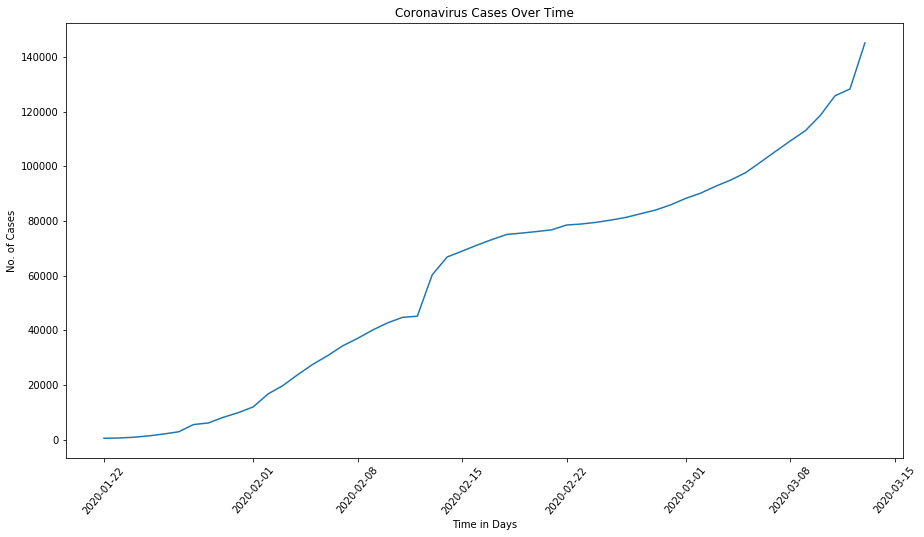

In [234]:
plt.figure(figsize=(15, 8))
plt.plot(date_a_r['Date'], date_a_r['Confirmed'])
plt.title('Coronavirus Cases Over Time')
plt.xlabel('Time in Days')
plt.ylabel('No. of Cases')
plt.xticks(rotation=50)
plt.show()

In [0]:
date_a_r_1 = world.groupby(['Country/Region', 'Date'])['Confirmed', 'Deaths', 'Recovered'].sum().reset_index()

In [236]:
date_a_r_1

,Country/Region,Date,Confirmed,Deaths,Recovered
0,Afghanistan,2020-01-22,0,0,0
1,Afghanistan,2020-01-23,0,0,0
2,Afghanistan,2020-01-24,0,0,0
3,Afghanistan,2020-01-25,0,0,0
4,Afghanistan,2020-01-26,0,0,0
...,...,...,...,...,...
6495,Vietnam,2020-03-09,30,0,16
6496,Vietnam,2020-03-10,31,0,16
6497,Vietnam,2020-03-11,38,0,16
6498,Vietnam,2020-03-12,39,0,16


In [237]:
fig = px.bar(date_a_r_1, x="Date", y="Confirmed", color='Country/Region', orientation='v', height=600,
             title='Coronavirus Confirmed Cases Over Time ', color_discrete_sequence = px.colors.cyclical.mygbm)
fig.show()

**Coronavirus Cases Death Over Time**

In [0]:
date_a_d = world.groupby('Date')[['Country/Region','Deaths']].sum().reset_index()

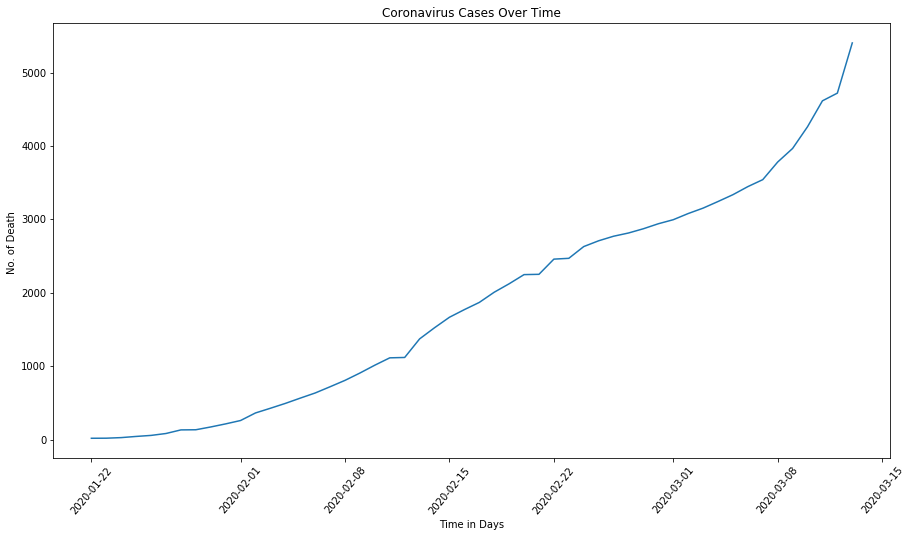

In [239]:
plt.figure(figsize=(15, 8))
plt.plot(date_a_d.Date, date_a_d.Deaths)
plt.title('Coronavirus Cases Over Time')
plt.xlabel('Time in Days')
plt.ylabel('No. of Death ')
plt.xticks(rotation=50)
plt.show()

In [240]:
fig = px.bar(date_a_r_1, x="Date", y="Deaths", color='Country/Region', orientation='v', height=600,
             title='Coronavirus Deaths Cases Over Time ', color_discrete_sequence = px.colors.cyclical.IceFire)
fig.show()

**Spread over time in CHINA**

In [0]:
date_china = china.groupby(['Country/Region', 'Date'])['Confirmed', 'Deaths', 'Recovered'].sum().reset_index()

In [148]:
temp_spd_china = date_china.melt(id_vars='Date', value_vars=['Confirmed', 'Deaths', 'Recovered'],
                var_name='Case', value_name='Count')
fig = px.bar(temp_spd_china, x="Date", y="Count", color='Case', facet_col="Case",
            title='Cases in China', color_discrete_sequence=cdr)
fig.show()

**Spread over time in OUTSIDE CHINA**

In [0]:
date_out_china = outside_china.groupby(['Country/Region', 'Date'])['Confirmed', 'Deaths', 'Recovered'].sum().reset_index()

In [243]:
temp_spd_out_china = date_out_china.melt(id_vars='Date', value_vars=['Confirmed', 'Deaths', 'Recovered'],
                var_name='Case', value_name='Count')
fig = px.bar(temp_spd_out_china, x="Date", y="Count", color='Case', facet_col="Case",
            title='Cases Outside China', color_discrete_sequence=idr)
fig.show()

<b>CORONAVIRUS WORLD MAP</b>

In [0]:
# World wide
world_map = folium.Map(location=[0, 0], tiles='cartodbpositron',
            min_zoom=1, max_zoom=4, zoom_start=1,width='50%',height='50%',position='absolute')

In [0]:
#world_map

In [0]:
for i in range(0, len(world_latest)):
    folium.Circle(
        location=[world_latest.iloc[i]['Lat'], world_latest.iloc[i]['Long']],
        color='crimson', 
        tooltip =   '<li><bold>Country : '+str(world_latest.iloc[i]['Country/Region'])+
                    '<li><bold>Province : '+str(world_latest.iloc[i]['Province/State'])+
                    '<li><bold>Confirmed : '+str(world_latest.iloc[i]['Confirmed'])+
                    '<li><bold>Deaths : '+str(world_latest.iloc[i]['Deaths'])+
                    '<li><bold>Recovered : '+str(world_latest.iloc[i]['Recovered']),
        radius=int(world_latest.iloc[i]['Confirmed'])).add_to(world_map)

In [247]:
world_map

<b>CORONAVIRUS CHINA MAP</b>

In [0]:
# China wide
china_map = folium.Map(location=[30,116], tiles='cartodbpositron',
            min_zoom=2, max_zoom=5, zoom_start=3)

In [0]:
#china_map

In [0]:
for i in range(0, len(china_latest)):
    folium.Circle(
        location=[china_latest.iloc[i]['Lat'], china_latest.iloc[i]['Long']],
        color='crimson', 
        tooltip =   '<li><bold>Country : '+str(china_latest.iloc[i]['Country/Region'])+
                    '<li><bold>Province : '+str(china_latest.iloc[i]['Province/State'])+
                    '<li><bold>Confirmed : '+str(china_latest.iloc[i]['Confirmed'])+
                    '<li><bold>Deaths : '+str(china_latest.iloc[i]['Deaths'])+
                    '<li><bold>Recovered : '+str(china_latest.iloc[i]['Recovered']),
        radius=int(china_latest.iloc[i]['Confirmed'])).add_to(china_map)

In [251]:
china_map

<b> Affected Countries Till Now</b>

In [0]:
aff_fig = px.choropleth(world_latest_grouped,title='Countries with Confirmed Cases',locations='Country/Region',color='Confirmed',locationmode='country names'
           ,hover_name='Country/Region',color_continuous_scale='agsunset',range_color=[1,50])

In [253]:
aff_fig.update(layout_coloraxis_showscale=False)
aff_fig.show()

<b> Countries with DEATH Till Now</b>

In [254]:
aff_fig_d = px.choropleth(world_latest_grouped,title='Countries with Death Cases',locations='Country/Region',color='Deaths',locationmode='country names'
           ,hover_name='Country/Region',color_continuous_scale='Reds',range_color=[1,50])
aff_fig_d.update(layout_coloraxis_showscale=False)
aff_fig_d.show()

**Diamond Princess Cruise Ship**

In [255]:
temp_ship = ship.sort_values(by='Date', ascending=False).head(1)
temp_ship = temp_ship[['Province/State', 'Confirmed', 'Deaths', 'Recovered']].reset_index(drop=True)
temp_ship.style.background_gradient(cmap='rainbow')

,Province/State,Confirmed,Deaths,Recovered


In [0]:
temp_ship_1 = ship.groupby('Date')['Confirmed',	'Deaths'	,'Recovered'].sum().reset_index()

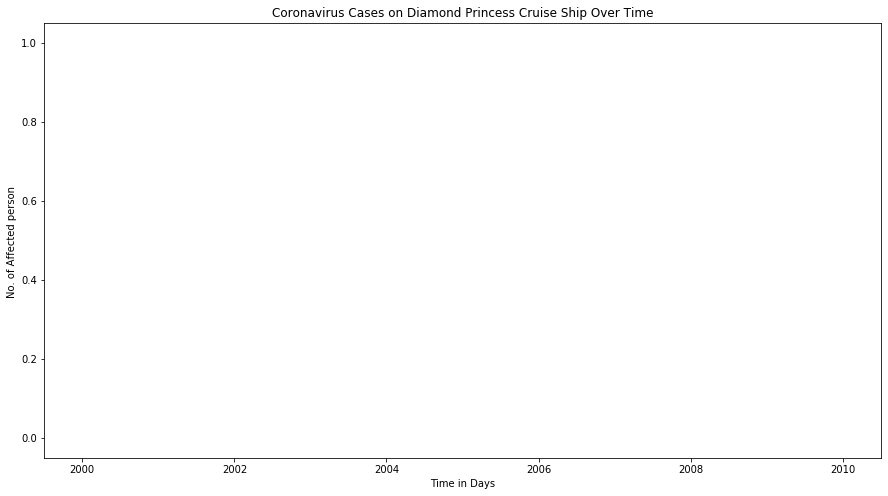

In [257]:
plt.figure(figsize=(15, 8))
plt.plot(temp_ship_1.Date, temp_ship_1.Confirmed)
plt.title('Coronavirus Cases on Diamond Princess Cruise Ship Over Time')
plt.xlabel('Time in Days')
plt.ylabel('No. of Affected person ')
plt.xticks()
plt.show()

**Number of Cases Every-Day OUTSIDE CHINA**

In [0]:
every_day_outside_china =  outside_china.groupby('Date')['Confirmed', 'Deaths', 'Recovered'].sum().diff().reset_index()

In [259]:
every_day_outside_china = every_day_outside_china.melt(id_vars="Date", 
                 value_vars=['Confirmed', 'Deaths', 'Recovered'])

fig = px.bar(every_day_outside_china, x="Date", y="value", color='variable', 
             title='Outside China',
             color_discrete_sequence=idr)
fig.update_layout(barmode='group')
fig.show()

**Number of Cases Every-Day IN CHINA**

In [0]:
every_day_china = china.groupby('Date')['Confirmed', 'Deaths', 'Recovered'].sum().diff().reset_index()

In [261]:
every_day_china = every_day_china.melt(id_vars="Date", 
                 value_vars=['Confirmed', 'Deaths', 'Recovered'])

fig = px.bar(every_day_china, x="Date", y="value", color='variable', 
             title='Every Day Cases In China',
             color_discrete_sequence=idr)
fig.update_layout(barmode='group')
fig.show()

<b>Mortality Rate = No. Death Cases / No. of Confirmed Cases * 100 </b><br>
<b>Recovery Rate = No. Recovered Cases / No. of Confirmed Cases * 100 <br></b>
(To every 100 Indivisual)

In [262]:
temp_world = world.groupby('Date').sum().reset_index()
temp_world.head()

,Date,Lat,Long,Confirmed,Deaths,Recovered,Active
0,2020-01-22,6770.4815,1837.6518,554,17,28,509
1,2020-01-23,6770.4815,1837.6518,652,18,30,604
2,2020-01-24,6770.4815,1837.6518,939,26,36,877
3,2020-01-25,6770.4815,1837.6518,1432,42,39,1351
4,2020-01-26,6770.4815,1837.6518,2113,56,52,2005


In [0]:
temp_world['No_of_death_to_100_confirmed_cases'] = round(temp_world['Deaths']/temp_world['Confirmed'],3)*100
temp_world['No_of_Recovered_to_100_confirmed_cases'] = round(temp_world['Recovered']/temp_world['Confirmed'],3)*100
temp_world['No_of_Recovered_to_1_Death_cases'] = round(temp_world['Recovered']/temp_world['Deaths'],3)

In [264]:
temp_world.head()

,Date,Lat,Long,Confirmed,Deaths,Recovered,Active,No_of_death_to_100_confirmed_cases,No_of_Recovered_to_100_confirmed_cases,No_of_Recovered_to_1_Death_cases
0,2020-01-22,6770.4815,1837.6518,554,17,28,509,3.1,5.1,1.647
1,2020-01-23,6770.4815,1837.6518,652,18,30,604,2.8,4.6,1.667
2,2020-01-24,6770.4815,1837.6518,939,26,36,877,2.8,3.8,1.385
3,2020-01-25,6770.4815,1837.6518,1432,42,39,1351,2.9,2.7,0.929
4,2020-01-26,6770.4815,1837.6518,2113,56,52,2005,2.7,2.5,0.929


In [0]:
temp_world = temp_world.melt(id_vars='Date', 
                 value_vars=['No_of_death_to_100_confirmed_cases','No_of_Recovered_to_100_confirmed_cases', 'No_of_Recovered_to_1_Death_cases'], 
                 var_name='Ratio', 
                 value_name='Value')

In [266]:
fig = px.line(temp_world, x="Date", y="Value", color='Ratio', 
              title='Recovery and Mortality Rate Over The Time',color_discrete_sequence=cdr)
fig.show()

**Recovered:Death (Over the World)**

In [0]:
import plotly.graph_objs as go

In [268]:
world.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active
0,NA,Thailand,15.0000,101.0000,2020-01-22,2,0,0,2
1,NA,Japan,36.0000,138.0000,2020-01-22,2,0,0,2
2,NA,Singapore,1.2833,103.8333,2020-01-22,0,0,0,0
3,NA,Nepal,28.1667,84.2500,2020-01-22,0,0,0,0
4,NA,Malaysia,2.5000,112.5000,2020-01-22,0,0,0,0


In [0]:
values = [world['Recovered'].sum(),world['Deaths'].sum(),world['Active'].sum()]
colors = ['mediumturquoise', 'orangered','rainbow']

In [272]:
fig = go.Figure(data=[go.Pie(labels=['Recovered','Deaths','Active'], 
                             values=values , hole=.3)])

fig.update_traces(hoverinfo='label+percent+value', textinfo='label+percent', textfont_size=18,
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))

fig.update_layout(
    title_text="Death/Recovered Rate (Till "+" "+str(latest_date.date())+")", height=500, width=700, showlegend=False)

fig.show()

**Recovered:Death (China)**

In [0]:
values_china = [china['Recovered'].sum(),china['Deaths'].sum(),china['Active'].sum()]
colors_china = ['rainbow', 'orangered','mediumturquoise']

In [274]:
fig = go.Figure(data=[go.Pie(labels=['Recovered','Deaths','Active'], 
                             values=values_china , hole=.3)])

fig.update_traces(hoverinfo='label+percent+value', textinfo='label+percent', textfont_size=18,
                  marker=dict(colors=colors_china, line=dict(color='#000000', width=2)))

fig.update_layout(
    title_text="Death/Recovered Rate in China (Till "+" "+str(latest_date.date())+")", height=500, width=700, showlegend=False)

fig.show()